In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

#Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

In [4]:
#store captions and image names in vectors
all_captions = []
all_img_name_vector = []

In [189]:
import csv
data_parent_dir = 'Data/Split_Dataset'
img_parent_dir = 'Data/Labelled_Images'
train_data = data_parent_dir +'/'+ 'Training_meme_dataset.csv'
with open(train_data) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for i, row in enumerate(csv_reader):
        if i == 0:
            continue
        if '.png' not in row[0]:
            continue
            
        caption = '<start> ' + row[1] + ' <end>'
        full_coco_image_path = img_parent_dir + '/' + row[0]
        all_img_name_vector.append(full_coco_image_path)
        all_captions.append(caption)

In [190]:
#shuffle captions and image_names together
#set a random state
print(len(all_captions), len(all_img_name_vector))
train_captions, img_name_vector = shuffle(all_captions,
                                         all_img_name_vector,
                                         random_state = 1)
#select the first 30 captions from the shuffled set
num_examples = 400
train_captions = train_captions[:num_examples]
img_name_vector = img_name_vector[:num_examples]
len(train_captions), len(all_captions)

430 430


(400, 430)

In [191]:
len(max(all_captions, key=len))

1615

In [192]:
len(all_captions), len(all_img_name_vector)


(430, 430)

In [193]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [194]:
image_model = tf.keras.applications.InceptionV3(include_top = False,
                                               weights = 'imagenet')
new_input = image_model.input

In [195]:
hidden_layer = image_model.layers[-1].output

In [196]:
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [197]:
!pip install -q tqdm

In [198]:
from tqdm import tqdm

In [199]:
#get unique images
encode_train = sorted(set(img_name_vector))

#feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(16)

    

In [200]:
image_dataset

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

In [201]:
for img, path in image_dataset:
    print(path)
    batch_features = image_features_extract_model(img)
    print(batch_features.shape)
    batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1 , batch_features.shape[3]))
    print(batch_features.shape)
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode('utf-8')
        np.save(path_of_feature, bf.numpy())

tf.Tensor(
[b'MultiOFF_Dataset/Labelled_Images/00DjNzR.png'
 b'MultiOFF_Dataset/Labelled_Images/0JM56ut.png'
 b'MultiOFF_Dataset/Labelled_Images/0Jzts4J.png'
 b'MultiOFF_Dataset/Labelled_Images/0P5i3yI.png'
 b'MultiOFF_Dataset/Labelled_Images/0UQh5Eo.png'
 b'MultiOFF_Dataset/Labelled_Images/0WBXRH9.png'
 b'MultiOFF_Dataset/Labelled_Images/0nF9BpI.png'
 b'MultiOFF_Dataset/Labelled_Images/0p7HM8n.png'
 b'MultiOFF_Dataset/Labelled_Images/0vqvDs5.png'
 b'MultiOFF_Dataset/Labelled_Images/16vTnwg.png'
 b'MultiOFF_Dataset/Labelled_Images/1DY6I9Q.png'
 b'MultiOFF_Dataset/Labelled_Images/1JQk5NF.png'
 b'MultiOFF_Dataset/Labelled_Images/1YQOnyG.png'
 b'MultiOFF_Dataset/Labelled_Images/1Yj5Kns.png'
 b'MultiOFF_Dataset/Labelled_Images/1nSSB9S.png'
 b'MultiOFF_Dataset/Labelled_Images/2MXmVri.png'], shape=(16,), dtype=string)
(16, 8, 8, 2048)
(16, 64, 2048)
tf.Tensor(
[b'MultiOFF_Dataset/Labelled_Images/2NS27kx.png'
 b'MultiOFF_Dataset/Labelled_Images/2Qo03El.png'
 b'MultiOFF_Dataset/Labelled_Images

(16, 8, 8, 2048)
(16, 64, 2048)
tf.Tensor(
[b'MultiOFF_Dataset/Labelled_Images/NypZ28n.png'
 b'MultiOFF_Dataset/Labelled_Images/O1JHlod.png'
 b'MultiOFF_Dataset/Labelled_Images/O3KNvgz.png'
 b'MultiOFF_Dataset/Labelled_Images/OA7aCgM.png'
 b'MultiOFF_Dataset/Labelled_Images/Oa1JNby.png'
 b'MultiOFF_Dataset/Labelled_Images/Ob1Q9v8.png'
 b'MultiOFF_Dataset/Labelled_Images/OhXur08.png'
 b'MultiOFF_Dataset/Labelled_Images/PAEZU3T.png'
 b'MultiOFF_Dataset/Labelled_Images/PCnauaB.png'
 b'MultiOFF_Dataset/Labelled_Images/PdPdKfd.png'
 b'MultiOFF_Dataset/Labelled_Images/PjZa9M1.png'
 b'MultiOFF_Dataset/Labelled_Images/Pn18AKw.png'
 b'MultiOFF_Dataset/Labelled_Images/PpxbGZC.png'
 b'MultiOFF_Dataset/Labelled_Images/Q29wRyg.png'
 b'MultiOFF_Dataset/Labelled_Images/QHHMKB3.png'
 b'MultiOFF_Dataset/Labelled_Images/QLQ4taO.png'], shape=(16,), dtype=string)
(16, 8, 8, 2048)
(16, 64, 2048)
tf.Tensor(
[b'MultiOFF_Dataset/Labelled_Images/QebeqSh.png'
 b'MultiOFF_Dataset/Labelled_Images/Qlm1siZ.png'
 b'

(16, 8, 8, 2048)
(16, 64, 2048)
tf.Tensor(
[b'MultiOFF_Dataset/Labelled_Images/nlzn1IN.png'
 b'MultiOFF_Dataset/Labelled_Images/nm9n7k0.png'
 b'MultiOFF_Dataset/Labelled_Images/nqfekut.png'
 b'MultiOFF_Dataset/Labelled_Images/oEGSd01.png'
 b'MultiOFF_Dataset/Labelled_Images/oHjgmJS.png'
 b'MultiOFF_Dataset/Labelled_Images/oKD3FG3.png'
 b'MultiOFF_Dataset/Labelled_Images/ogrQSpx.png'
 b'MultiOFF_Dataset/Labelled_Images/okIQiIu.png'
 b'MultiOFF_Dataset/Labelled_Images/omVP1Lw.png'
 b'MultiOFF_Dataset/Labelled_Images/oqt51kd.png'
 b'MultiOFF_Dataset/Labelled_Images/orV6OVk.png'
 b'MultiOFF_Dataset/Labelled_Images/otfhxeo.png'
 b'MultiOFF_Dataset/Labelled_Images/oyjvlEa.png'
 b'MultiOFF_Dataset/Labelled_Images/p2ciRYD.png'
 b'MultiOFF_Dataset/Labelled_Images/p3MNKdN.png'
 b'MultiOFF_Dataset/Labelled_Images/p3u6fbf.png'], shape=(16,), dtype=string)
(16, 8, 8, 2048)
(16, 64, 2048)
tf.Tensor(
[b'MultiOFF_Dataset/Labelled_Images/p8cqujC.png'
 b'MultiOFF_Dataset/Labelled_Images/pOkTegk.png'
 b'

In [202]:
#find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [203]:
#choose the top 30 words from the vocabulary
top_k = 294
tokenizer = tf.keras.preprocessing.text.Tokenizer( 
                                                 oov_token="<unk>",
                                                 filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

In [204]:
tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)
len(tokenizer.index_word)

4124

In [205]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [206]:
 len(tokenizer.index_word)

4125

In [207]:
tokenizer.sequences_to_texts(train_seqs)

["<start> deserttson methlehem never ask a british person about the price of freddo 's abithehugslut answered you whats the price of freddo 's deserttsong okay right so basically freddo 's originally cost 5 pence those were the good days the happy days full of joy and sunshine and cheap delicious chocolaty treats but then the economy went to helland cadbury the chocolate company who literally make all the good chocolate in england were like hey lets raise the price to 8 pence and everyone was like we understand times are hard but then cadbury raised them to 10 pence like okay dudes woh stop thats double the original price and then they raised it to 20 pence per freddo that is fucklng bullshit once you could buy 20 freddos for one pound and now you can only buy 4 fuck asked a british person about freddo 's <end>",
 "<start> ya boi bernie apr 30 at 6 48pm oh noe if you come upon this image while scrolling you have been visited by dat bol bernie comment o shit waddup '' in 42069 seconds a

In [208]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [209]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

In [210]:
# Create training and validation sets using an 80-20 split
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,
                                                                    cap_vector,
                                                                    test_size=0.1,
                                                                    random_state=0)

In [211]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(360, 360, 40, 40)

In [231]:
img_name_val[0]

('MultiOFF_Dataset/Labelled_Images/qMmIGUr.png',
 array([  3,  65,  59, 413,  42,   9, 116,   5,  36,  40,   5,  31,   4,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
  

In [212]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size =  len(tokenizer.index_word) +1 
print(vocab_size)
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

4126


In [213]:
# Load the numpy files
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

In [214]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [215]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # score shape == (batch_size, 64, hidden_size)
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    # attention_weights shape == (batch_size, 64, 1)
    # you get 1 at the last axis because you are applying score to self.V
    attention_weights = tf.nn.softmax(self.V(score), axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [216]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [217]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [218]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [219]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [220]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [221]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [222]:
# adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
loss_plot = []

In [223]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [224]:
EPOCHS = 1000

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 1.0408
Epoch 1 Loss 1.291292
Time taken for 1 epoch 602.1315240859985 sec

Epoch 2 Batch 0 Loss 0.8028
Epoch 2 Loss 1.180157
Time taken for 1 epoch 94.03760695457458 sec

Epoch 3 Batch 0 Loss 0.9079
Epoch 3 Loss 1.154089
Time taken for 1 epoch 92.37520694732666 sec

Epoch 4 Batch 0 Loss 0.9995
Epoch 4 Loss 1.154901
Time taken for 1 epoch 92.09920716285706 sec

Epoch 5 Batch 0 Loss 0.8816
Epoch 5 Loss 1.139070
Time taken for 1 epoch 90.74406623840332 sec

Epoch 6 Batch 0 Loss 1.0351
Epoch 6 Loss 1.125883
Time taken for 1 epoch 94.76208806037903 sec

Epoch 7 Batch 0 Loss 0.8628
Epoch 7 Loss 1.115371
Time taken for 1 epoch 89.45773434638977 sec

Epoch 8 Batch 0 Loss 0.8871
Epoch 8 Loss 1.096850
Time taken for 1 epoch 89.22834777832031 sec

Epoch 9 Batch 0 Loss 0.8283
Epoch 9 Loss 1.090905
Time taken for 1 epoch 87.71482014656067 sec

Epoch 10 Batch 0 Loss 0.8835
Epoch 10 Loss 1.075838
Time taken for 1 epoch 89.70932698249817 sec

Epoch 11 Batch 0 Loss 0.8562
Epoch 11 

Epoch 85 Batch 0 Loss 0.0402
Epoch 85 Loss 0.056388
Time taken for 1 epoch 103.53742599487305 sec

Epoch 86 Batch 0 Loss 0.0471
Epoch 86 Loss 0.054168
Time taken for 1 epoch 105.0888020992279 sec

Epoch 87 Batch 0 Loss 0.0557
Epoch 87 Loss 0.051117
Time taken for 1 epoch 120.55868625640869 sec

Epoch 88 Batch 0 Loss 0.0420
Epoch 88 Loss 0.048235
Time taken for 1 epoch 111.38552188873291 sec

Epoch 89 Batch 0 Loss 0.0336
Epoch 89 Loss 0.045153
Time taken for 1 epoch 104.9291398525238 sec

Epoch 90 Batch 0 Loss 0.0472
Epoch 90 Loss 0.042597
Time taken for 1 epoch 103.71576285362244 sec

Epoch 91 Batch 0 Loss 0.0387
Epoch 91 Loss 0.042200
Time taken for 1 epoch 102.91695284843445 sec

Epoch 92 Batch 0 Loss 0.0284
Epoch 92 Loss 0.041520
Time taken for 1 epoch 101.16185021400452 sec

Epoch 93 Batch 0 Loss 0.0330
Epoch 93 Loss 0.037665
Time taken for 1 epoch 96.72701001167297 sec

Epoch 94 Batch 0 Loss 0.0253
Epoch 94 Loss 0.037994
Time taken for 1 epoch 99.38084506988525 sec

Epoch 95 Batch

Epoch 167 Batch 0 Loss 0.0287
Epoch 167 Loss 0.031782
Time taken for 1 epoch 140.79232907295227 sec

Epoch 168 Batch 0 Loss 0.0201
Epoch 168 Loss 0.032342
Time taken for 1 epoch 137.04884505271912 sec

Epoch 169 Batch 0 Loss 0.0260
Epoch 169 Loss 0.029889
Time taken for 1 epoch 138.2376058101654 sec

Epoch 170 Batch 0 Loss 0.0198
Epoch 170 Loss 0.030540
Time taken for 1 epoch 138.42946195602417 sec

Epoch 171 Batch 0 Loss 0.0149
Epoch 171 Loss 0.029502
Time taken for 1 epoch 139.39729833602905 sec

Epoch 172 Batch 0 Loss 0.0141
Epoch 172 Loss 0.025699
Time taken for 1 epoch 143.85266089439392 sec

Epoch 173 Batch 0 Loss 0.0269
Epoch 173 Loss 0.025444
Time taken for 1 epoch 122.28162598609924 sec

Epoch 174 Batch 0 Loss 0.0188
Epoch 174 Loss 0.023075
Time taken for 1 epoch 121.49742293357849 sec

Epoch 175 Batch 0 Loss 0.0173
Epoch 175 Loss 0.022803
Time taken for 1 epoch 104.65760684013367 sec

Epoch 176 Batch 0 Loss 0.0139
Epoch 176 Loss 0.020044
Time taken for 1 epoch 101.08280611038

KeyboardInterrupt: 

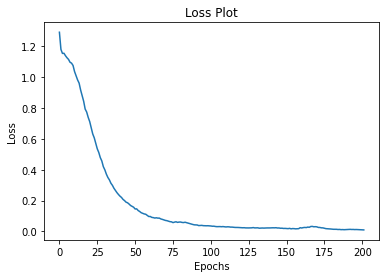

In [225]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Loss Plot')
plt.show()

In [226]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [227]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

In [240]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!',ckpt_manager.latest_checkpoint)
image_path = img_name_val[2]
print(image_path)

# image_path = 'surf.jpg'
hidden = decoder.reset_state(batch_size=1)
temp_input = tf.expand_dims(load_image(image_path)[0], 0)
img_tensor_val = image_features_extract_model(temp_input)
print( (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

features = encoder(img_tensor_val)

dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
result = []

for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])
        if tokenizer.index_word[predicted_id] == '<end>':
            break
        dec_input = tf.expand_dims([predicted_id], 0)
print(' '.join(result))

Latest checkpoint restored!! ./checkpoints/train/ckpt-41
MultiOFF_Dataset/Labelled_Images/HUU1Fay.png
(1, -1, 2048)
in bernie in a just trump just just trump trump just just just just just just just just just trump in bernie <end>
